Whitney Kenner  
u0777962  
movie lab  
Partners: Mack Tawa, Felix Ye, Howard Tung, Branden Frieden  
CS6017  
7-20-23  


### Step 1: Ingest the Data

In [166]:
import json
import networkx as nx
import matplotlib.pyplot as plt

#Task 1: Read the data in and convert each line into a JSON object.  Store each of these "movie" objects in a list.



movies_list = []
# Task 1
with open("imdb.json", "r", errors="ignore") as file:
    for line in file:
        line = line.strip()
        # if line == '{"Response":"False","Error":"Movie not found!"}':
        #     pass
        #
        try:
                movie_object = json.loads(line)
                movies_list.append(movie_object)
        except json.JSONDecodeError:
                pass
print("Total movies: ", len(movies_list))
#

Total movies:  115056


In [167]:
# Task 2
#convert from "[uk, usa]" to ['uk', 'usa']
#46592
usa_movie_list = []
for movie in movies_list:
    if movie.get("Country") == None:
        continue
    elif "USA" in movie.get("Country"):
        usa_movie_list.append(movie)
    # elif "USA" in str.split(movie.get("Country")):
    #     usa_movie_list.append(movie)
print('Total USA movies: ', len(usa_movie_list))

#Dav does not like this way, prefers a string split

Total USA movies:  46592


### Step 2: Kevin Bacon

In [168]:

#57 Kevin Bacon movies
graph = nx.Graph()
for movie in usa_movie_list:
    if movie.get("Actors") == "N/A":
        continue
    #print(movie.get("Actors"))
    actors_in_movie = movie.get("Actors").split(", ")
    #print(actors_in_movie)
    for actor in actors_in_movie:
        if not graph.has_node(actor):
            graph.add_node(actor, movie_num=1)
        else:
            graph.nodes[actor]["movie_num"] = graph.nodes[actor]["movie_num"] +1
    for actor in actors_in_movie:
        for costar in actors_in_movie:
            if actor != costar:
                graph.add_edge(actor, costar)

#print(max(dict(graph.degree()).items(), key = lambda x: x[1]))
#print(graph.number_of_nodes())

max_movies = 0
max_movies_actor = ""

for node in graph.nodes():
    if graph.nodes[node]["movie_num"] > max_movies:
        max_movies = graph.nodes[node]["movie_num"]
        max_movies_actor = node

print("The actor with the most movies is ", max_movies_actor, " with ", max_movies, " number of movies")

The actor with the most movies is  Oliver Hardy  with  264  number of movies


Oliver Hardy starred in the most movies: 264

In [169]:
#How many movies was Kevin Bacon in? How many costars has he had?

print("Kevin Bacon has ",graph.degree("Kevin Bacon"), " costars")
print("Kevin Bacon was in ", graph.nodes["Kevin Bacon"]["movie_num"], " movies")

Kevin Bacon has  127  costars
Kevin Bacon was in  57  movies


Kevin Bacon had 127 costars and starred in 57 movies

In [170]:
#What is the median number of costars an actor has had?
listGraph = list( nx.degree( graph ) )
sorted_list = sorted(listGraph)
sorted_list

print(sorted_list[len(sorted_list)//2][1])

3


The median number of actors is 3

the number of actors with NO connection to Kevin Bacon:  13317


(array([1.2800e+02, 3.0420e+03, 1.4823e+04, 1.3303e+04, 4.1640e+03,
        8.9200e+02, 3.8000e+01, 1.7000e+01, 6.0000e+00, 9.0000e+00]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

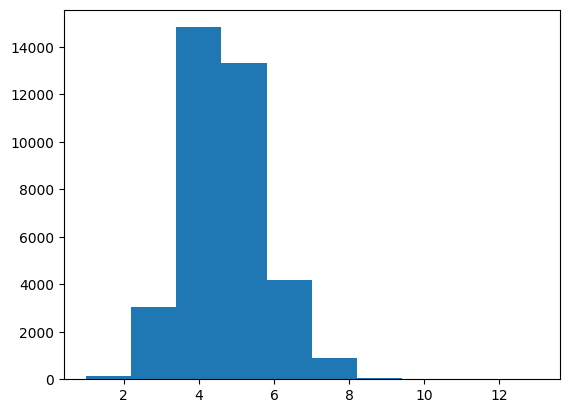

In [171]:
#Is the "6 degrees of separation" from Kevin Bacon theory true? If not, provide counterexamples.
#Hint: Compute length of path between Kevin Bacon and everyone else (then show the histogram).
#Helpful networkx functions: nx.shortest_path(), nx.has_path()

import seaborn as sns

degree_limit = 6
distances_from_kevin_bacon = []
num_actors_no_connection = 0


for node in graph.nodes():
    if nx.has_path(graph, source=node, target="Kevin Bacon"):
        distances_from_kevin_bacon.append(len(nx.shortest_path(graph, node, "Kevin Bacon")))
            #if len(nx.shortest_path(graph, source=node, target="Kevin Bacon")) > degree_limit:
    else:
        num_actors_no_connection+=1
            #print("False, not all actors are within 6 degrees of seperation")
            #print(node, " is ", len(nx.shortest_path(graph, node, "Kevin Bacon")), " away")

print("the number of actors with NO connection to Kevin Bacon: ", num_actors_no_connection)

plt.hist(distances_from_kevin_bacon)


As you can see there are 13317 actors with absolutely no connection to Kevin Bacon. On the histogram you can see there are actors with 7, 8, and 9 degrees of separation as well

### Step 3: Other Actor Analysis

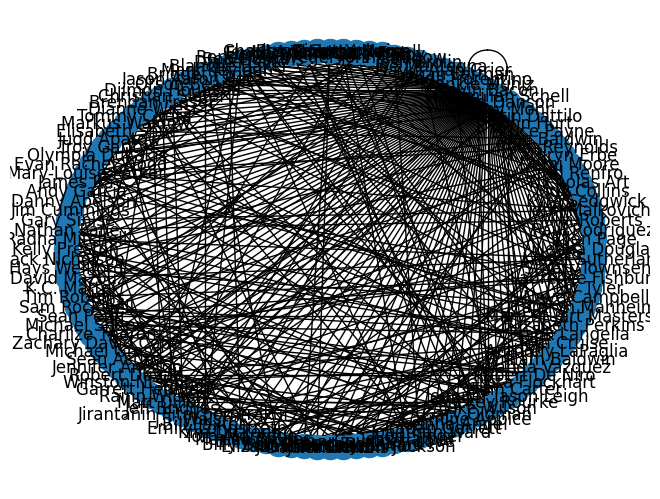

In [172]:
graph.add_edge("Kevin Bacon", "Kevin Bacon")
kevin_bacon_costar_graph = graph.subgraph(graph.neighbors("Kevin Bacon"))
# kevin_bacon_costar_graph = nx.Graph(kevin_bacon_costar)
# kevin_bacon_costar_graph.add_node("Kevin Bacon")
# for costar in kevin_bacon_costar_graph:
#     graph.add_edge(costar, "Kevin Bacon")
    
#circular layout
nx.draw( kevin_bacon_costar_graph, with_labels=True, pos=nx.circular_layout( kevin_bacon_costar_graph))

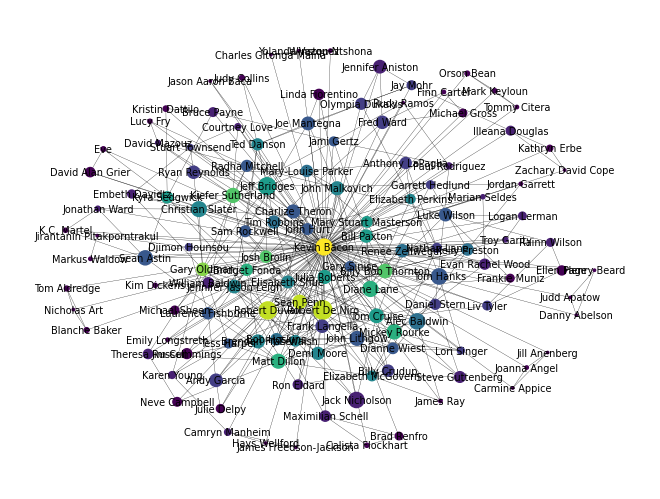

In [173]:
#spring layout 
pos = nx.spring_layout(kevin_bacon_costar_graph)

subdegrees= kevin_bacon_costar_graph.degree()
maindegrees= graph.degree()

colors=[subdegrees[n] for n in kevin_bacon_costar_graph]
sizes=[maindegrees[n] for n in kevin_bacon_costar_graph]

nx.draw(kevin_bacon_costar_graph, with_labels=True, pos=pos, width=.2, node_color=colors, node_size=sizes, font_size=7, vmax=14)

In [178]:
#Compute the PageRank of the graph (hint, networkx has a function for this) and print the 5 highest and lowest scoring actors. 
#What does the page rank tell you here? (Comment in your notebook.) 
pr = nx.pagerank(graph)

sortedList = sorted(pr.items(), key = lambda x: x[1])
lowestPageRank = [sortedList[:5]]
highestPageRank = [sortedList[-5:]]

print("Lowest: ", lowestPageRank)
print("Highest: ",highestPageRank)


Lowest:  [[('Stacy Dunn', 3.0402742287793097e-06), ('Lynnanne Zager', 3.0402742287793097e-06), ('Ramiro Gomez', 3.0402742287793097e-06), ('Milton S. Eisenhower', 3.0402742287793097e-06), ('Viola Dees', 3.0402742287793097e-06)]]
Highest:  [[('Mickey Rooney', 0.00025806365584250015), ('Steven Seagal', 0.0002713117656222533), ('John Wayne', 0.00028459278638466953), ('Harry Carey', 0.00030627043228688075), ('Oliver Hardy', 0.0003627219646454787)]]


Lowest 5: "Stacy Dunn", "Lynnanne Zager", "Ramiro Gomez", "Milton S. Eisenhower", "Viola Dees"  
Highest 5: 'Mickey Rooney'', 'Steven Seagal', 'John Wayne', 'Harry Carey', 'Oliver Hardy'  

What does the page rank tell you here?  
it is an algorithm that reflects the number of connections that go through a given node, so the highest 5 are the most connected and the lowest 5 are the least connected 